In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [5]:
# Files to Load and Read files
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv( "data/ride_data.csv")
ride_data.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
# Combine the data into a single dataset and display the data table for preview
cityridemerge_data = pd.merge(ride_data,city_data,how='left', on='city')
cityridemerge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [8]:
# Define variables
gcityridemerge_data = cityridemerge_data.groupby(['city']+['type']+['driver_count'])

# Avg fare per city
Avg_fare = gcityridemerge_data['fare'].mean()

# total rides per city
Total_rides = gcityridemerge_data['ride_id'].count()


df = pd.DataFrame({"Avg_Fare":Avg_fare, "Total_rides":Total_rides})
df = df.reset_index()


In [7]:
# Build the scatter plots for each city types
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}
7

# Build bubble chart

urban = df.Circle((0.5,0.5),0.1, facecolor = "lightcoral", alpha=.5, edgecolor="black",linewidth=.5)
suburban = df.Circle((0.5,0.5),0.1, facecolor = "lightskyblue", alpha=.5, edgecolor="black",linewidth=.5)
rural = urban = df.Circle((0.5,0.5),0.1, facecolor = "gold", alpha=.5, edgecolor="black",linewidth=.5)

df.loc[urban]
df.loc[suburban]
df.loc[rural]

NameError: name 'df' is not defined

In [5]:
# Show plot
x_axis = cityridemerge_data.arange(0, 10, 0.1)
types = []
for x in x_axis:
    types.append(x * x + cityridemerge_data.random.randint(0, np.ceil(max(x_axis))))

plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(markerscale=.5, title="City Type")
plt.show()

NameError: name 'cityridemerge_data' is not defined

## Total Fares by City Type

In [13]:
# Calculate Type Percents
rides_by_city = cityridemerge_data.groupby(['type'])

CFare = rides_by_city['fare'].sum()
CRides = rides_by_city['ride_id'].count()
CDrivers = rides_by_city['driver_count'].sum()

df2 = pd.DataFrame({"TotalFare":CFare, "TotalRides":CRides, "TotalDrivers":CDrivers})
df2 = df2.reset_index()
df2


,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


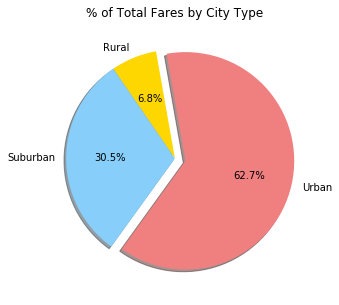

In [14]:
# Build Pie Chart
labels = df2['type']
sizes = df2['TotalFare']
colors = ["gold", "lightskyblue","lightcoral"]

explode = (0,0,0.1)

plt.figure(figsize=(7,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

In [32]:
# Calculate Ride Percents and build pie 
Rides_by_city = cityridemerge_data.groupby(['type'])

CFare = Rides_by_city['fare'].sum()
CRides = Rides_by_city['ride_id'].count()
CDrivers = Rides_by_city['driver_count'].sum()

df3 = pd.DataFrame({"TotalFare":CFare, "TotalRides":CRides, "TotalDrivers":CDrivers})
df3 = df3.reset_index()
df3


,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


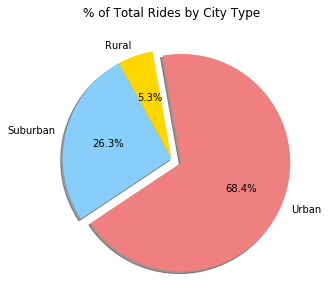

In [36]:
# Show Figure
labels = df3['type']
sizes = df3['TotalRides']
colors = ["gold", "lightskyblue","lightcoral"]

explode = (0,0,0.1)

plt.figure(figsize=(7,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("% of Total Rides by City Type")

plt.show()

## Total Drivers by City Type

In [34]:
# Calculate Driver Percents

rides_by_city = cityridemerge_data.groupby(['type'])

CFare = rides_by_city['fare'].sum()
CRides = rides_by_city['ride_id'].count()
CDrivers = rides_by_city['driver_count'].sum()

df4 = pd.DataFrame({"TotalDrivers:CFare, "TotalRides":CRides, "TotalDrivers":CDrivers})
df4 = df4.reset_index()
df4

,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


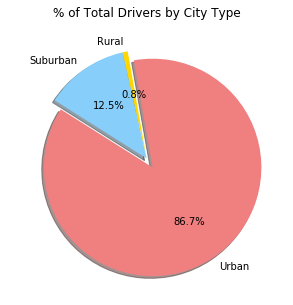

In [37]:
# Show Figure
labels = df4['type']
sizes = df4['TotalDrivers']
colors = ["gold", "lightskyblue","lightcoral"]

explode = (0,0,0.1)

plt.figure(figsize=(7,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("% of Total Drivers by City Type")

plt.show()